## Install and Import Dependencies

In [1]:
import torch
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/pramodyasahan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-9-23 Python-3.12.1 torch-2.4.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## Make Detections

In [3]:
img_path = 'cars.jpg'  
img = Image.open(img_path)

results = model(img)
results.print()

/Users/pramodyasahan/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 26.2ms pre-process, 457.1ms inference, 21.3ms NMS per image at shape (1, 3, 448, 640)


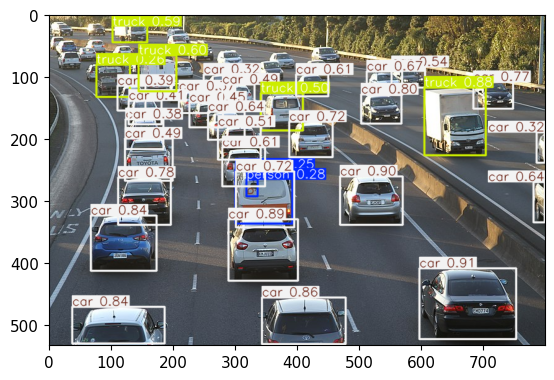

In [4]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [5]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

## Real Time Detections

In [6]:
'''
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
'''

"\ncap = cv2.VideoCapture(1)\nwhile cap.isOpened():\n    ret, frame = cap.read()\n    \n    # Make detections \n    results = model(frame)\n    \n    cv2.imshow('YOLO', np.squeeze(results.render()))\n    \n    if cv2.waitKey(10) & 0xFF == ord('q'):\n        break\ncap.release()\ncv2.destroyAllWindows()\n"

## Train from Scratch

In [7]:
import uuid  
import os
import time

In [8]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [9]:
'''
cap = cv2.VideoCapture(1)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
'''

"\ncap = cv2.VideoCapture(1)\n# Loop through labels\nfor label in labels:\n    print('Collecting images for {}'.format(label))\n    time.sleep(5)\n    \n    # Loop through image range\n    for img_num in range(number_imgs):\n        print('Collecting images for {}, image number {}'.format(label, img_num))\n        \n        # Webcam feed\n        ret, frame = cap.read()\n        \n        # Naming out image path\n        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')\n        \n        # Writes out image to file \n        cv2.imwrite(imgname, frame)\n        \n        # Render to the screen\n        cv2.imshow('Image Collection', frame)\n        \n        # 2 delay between captures\n        time.sleep(2)\n        \n        if cv2.waitKey(10) & 0xFF == ord('q'):\n            break\ncap.release()\ncv2.destroyAllWindows()\n"

In [10]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.8546bbce-79d0-11ef-8907-1acb248b1599.jpg


In [11]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)  

data/images/awake.8554fbb2-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.8554ff2c-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.855501d4-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.85550300-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.855503d2-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.85550490-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.85550594-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.8555063e-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.855506de-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.85550788-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.855508e6-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.85550b0c-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.85550c7e-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.85550eea-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.85551282-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.8555162e-79d0-11ef-8907-1acb248b1599.jpg
data/images/awake.855519a8-79d0-11ef-8907-1acb248b1599.j

In [12]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [13]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [14]:
import ssl
import certifi

# Use certifi's certificate store
ssl_context = ssl.create_default_context(cafile=certifi.where())

In [15]:
#!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data ../dataset.yaml --weights yolov5s.pt --workers 2

## Load Model

In [17]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp4/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/pramodyasahan/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-9-23 Python-3.12.1 torch-2.4.1 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [18]:
img = os.path.join('data', 'images', 'awake.9b24bf6c-79a4-11ef-8ef2-1acb248b1599.jpg')
results = model(img)

/Users/pramodyasahan/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [19]:
results.print()

image 1/1: 1080x1920 1 awake
Speed: 51.7ms pre-process, 281.7ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)


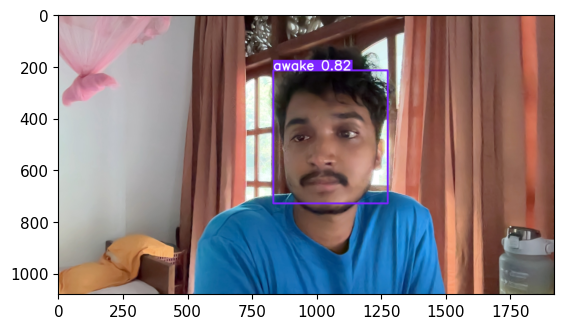

In [20]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [22]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

/Users/pramodyasahan/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/pramodyasahan/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/pramodyasahan/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/pramodyasahan/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/pramodyasahan/.cache/torch/hub/ul